# Logistic Regression Project - Solutions

** Credit: [Pieriandata.com](http://www.pieriandata.com) **

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [2]:
ad_data = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')

In [32]:
data_try = pd.read_pickle('DATA_FREQ_VDJ_CDR3_98')

In [47]:
feature_select = pd.read_pickle('feature_importance_1')

In [53]:
feature_select = feature_select.reset_index(drop=True)
feature_list = feature_select.loc[:,'FEATURE']
feature_list = feature_list.values

In [52]:
# save array of feature selected
from tempfile import TemporaryFile
outfile = TemporaryFile()
np.save(outfile, feature_list)
outfile.seek(0) # Only needed here to simulate closing & reopening file
np.load(outfile)

array(['V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'],
      dtype=object)

In [55]:
data2 = data_try.loc[:,{'SUBJECTn','SEX','CLIN','V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}]
data2.head()

,56-JL,CLIN,J4,V3_J1-VJ,V4-31,V1_J3_VJ,D7-27,D5/OR15-5a,SUBJECTn,V2_J1-VJ,...,V3-49,V3-20,47-JL,V3-23,V3-38,60-JL,V2_J6-VJ,V3-33,D5-24,50-JL
0,NaN,Healthy,0.503518,0.004614,0.028422,0.019093,0.008106,0.001759,BC_10,0.000204,...,0.006245,0.001478,NaN,0.156309,NaN,0.077696,0.003900,0.021310,0.024675,NaN
1,NaN,Healthy,0.537397,0.007162,0.030014,0.024007,0.011455,0.001367,BC_11,0.000462,...,0.009202,0.000655,0.000058,0.151377,NaN,0.076449,0.003234,0.027857,0.025643,0.000019
2,NaN,Healthy,0.485792,0.003754,0.025682,0.016831,0.006986,0.001218,BC_12,0.000075,...,0.009124,0.001989,NaN,0.084504,NaN,0.078115,0.004450,0.029535,0.025781,NaN
3,NaN,Healthy,0.529982,0.005394,0.034155,0.021854,0.008404,0.001076,BC_13,0.000916,...,0.013653,0.004100,NaN,0.112368,NaN,0.075581,0.006892,0.038343,0.029793,NaN
4,0.000018,Healthy,0.460081,0.006474,0.027602,0.026980,0.005513,0.001014,BC_14,0.000196,...,0.009142,0.001850,NaN,0.112899,NaN,0.077916,0.003824,0.035410,0.018745,NaN


**Check the head of ad_data**

In [3]:
ad_data.head()

,SUBJECTn,CLIN,SEX,V1,V2,V3,V4,V5,V6,V7,...,CDR3_AA_GRAVY.quter,CDR3_AA_GRAVY.tail,CDR3_AA_LENGTH.mean,CDR3_AA_LENGTH.str,CDR3_AA_LENGTH.quter,CDR3_AA_LENGTH.tail,CDR3_AA_POLARITY.mean,CDR3_AA_POLARITY.str,CDR3_AA_POLARITY.quter,CDR3_AA_POLARITY.tail
0,BC_10,Healthy,NaN,0.220240,0.023630,0.459240,0.232679,0.055238,0.008488,0.000484,...,-1.0,-0.17333333333333306,15.566583363084613,3.8140400573600988,13.0,18.0,8.413516101784207,0.5214524393531481,8.04705882352941,8.75454545454545
1,BC_11,Healthy,NaN,0.209268,0.026029,0.476099,0.235566,0.044202,0.008683,0.000154,...,-0.995833333333333,-0.123076923076923,15.436090515166105,3.6172652136720735,13.0,18.0,8.482599018559231,0.49800555512505285,8.13529411764706,8.805882352941179
2,BC_12,Healthy,NaN,0.205156,0.024936,0.415683,0.298063,0.031972,0.010342,0.013848,...,-0.986666666666667,-0.1459935897435895,16.115639999005246,4.112519249025375,13.0,19.0,8.439949841021718,0.4908470198259828,8.1,8.75333333333333
3,BC_13,Healthy,NaN,0.201297,0.046151,0.420261,0.275598,0.049830,0.006616,0.000247,...,-1.0,-0.12222222222222195,15.440365905091548,3.732484244150953,13.0,18.0,8.470984259102124,0.5001470227375485,8.125,8.79375
4,BC_14,Healthy,NaN,0.246696,0.021840,0.452630,0.223807,0.046810,0.007985,0.000231,...,-0.963157894736842,-0.123076923076923,15.976363377474014,3.9563694966376097,13.0,19.0,8.441183495909993,0.4968433667652791,8.091205533596842,8.76


# check and deal with null coulmns

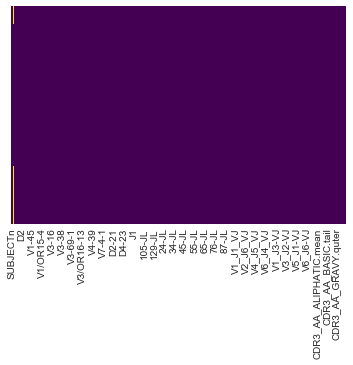

In [66]:
#  show the missing data
sns.heatmap(ad_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

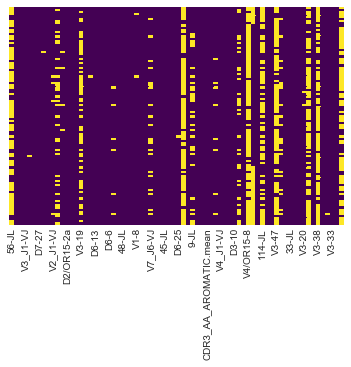

In [56]:
#  show the missing data (24 COULMNS / 72)
sns.heatmap(data2.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [67]:
# put mean for null
# Create our imputer to replace missing values with the mean e.g.
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(data2.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}])

data2.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}] = imp.transform(data2.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}])

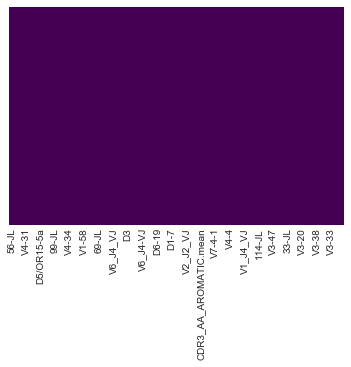

In [72]:
#  show the missing data (24 COULMNS / 72)
sns.heatmap(data2.loc[:,{ 'V2_J2_VJ','CDR3_AA_AROMATIC.mean', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24' }].isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [69]:
data2

,56-JL,CLIN,J4,V3_J1-VJ,V4-31,V1_J3_VJ,D7-27,D5/OR15-5a,SUBJECTn,V2_J1-VJ,...,V3-49,V3-20,47-JL,V3-23,V3-38,60-JL,V2_J6-VJ,V3-33,D5-24,50-JL
0,0.000043,Healthy,0.503518,0.004614,0.028422,0.019093,0.008106,0.001759,BC_10,0.000204,...,0.006245,0.001478,0.000043,0.156309,0.000055,0.077696,0.003900,0.021310,0.024675,0.000039
1,0.000043,Healthy,0.537397,0.007162,0.030014,0.024007,0.011455,0.001367,BC_11,0.000462,...,0.009202,0.000655,0.000058,0.151377,0.000055,0.076449,0.003234,0.027857,0.025643,0.000019
2,0.000043,Healthy,0.485792,0.003754,0.025682,0.016831,0.006986,0.001218,BC_12,0.000075,...,0.009124,0.001989,0.000043,0.084504,0.000055,0.078115,0.004450,0.029535,0.025781,0.000039
3,0.000043,Healthy,0.529982,0.005394,0.034155,0.021854,0.008404,0.001076,BC_13,0.000916,...,0.013653,0.004100,0.000043,0.112368,0.000055,0.075581,0.006892,0.038343,0.029793,0.000039
4,0.000018,Healthy,0.460081,0.006474,0.027602,0.026980,0.005513,0.001014,BC_14,0.000196,...,0.009142,0.001850,0.000043,0.112899,0.000055,0.077916,0.003824,0.035410,0.018745,0.000039
5,0.000039,Healthy,0.514823,0.010070,0.039329,0.013187,0.007242,0.001259,BC_16,0.000310,...,0.010863,0.000988,0.000019,0.162855,0.000055,0.066033,0.002343,0.055518,0.023799,0.000058
6,0.000043,Healthy,0.481777,0.005393,0.023070,0.040413,0.008672,0.001497,BC_17,0.000261,...,0.011428,0.001734,0.000043,0.102186,0.000055,0.075814,0.004182,0.015847,0.019743,0.000039
7,0.000043,Healthy,0.489055,0.005748,0.029075,0.027106,0.007126,0.001063,BC_18,0.000256,...,0.013091,0.005846,0.000043,0.097638,0.000020,0.076417,0.004862,0.028189,0.023110,0.000039
8,0.000043,Healthy,0.491691,0.007484,0.024013,0.022363,0.008810,0.001414,Biotech_045,0.000678,...,0.011285,0.003536,0.000059,0.104272,0.000055,0.077195,0.006511,0.026341,0.019446,0.000029
9,0.000026,Healthy,0.450794,0.005668,0.031034,0.015594,0.007438,0.001282,Biotech_050,0.000308,...,0.015953,0.001359,0.000026,0.048783,0.000026,0.079048,0.003437,0.071020,0.025546,0.000039


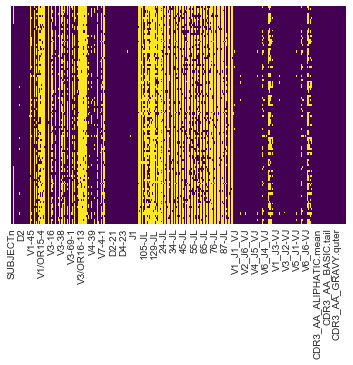

In [33]:
#  show the missing data (for original data)
sns.heatmap(data_try.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Data Cleaning
###We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

# need to do again after lab meeting

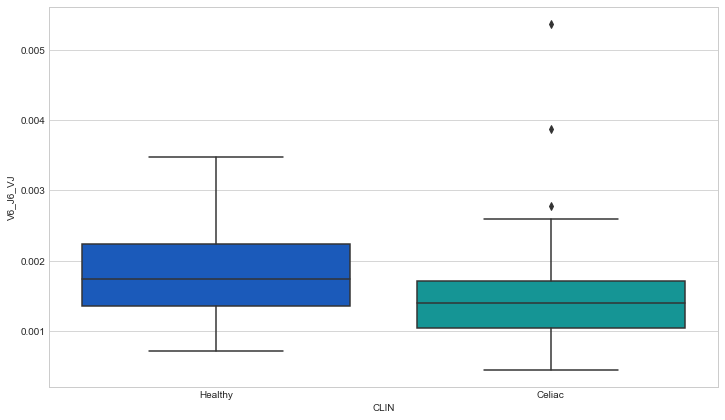

In [44]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='CLIN',y='V6_J6_VJ',data=ad_data,palette='winter')

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Great! Let's go ahead and drop the JL's columns and the rows in D2 that is NaN.

# --- up to hear do again null cleanung by mean according 'clin'--

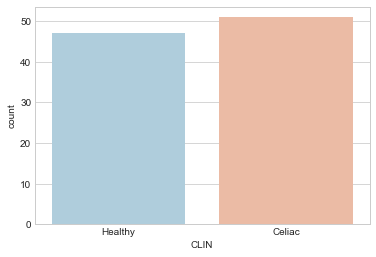

In [34]:
sns.set_style('whitegrid')
sns.countplot(x='CLIN',data=ad_data,palette='RdBu_r')

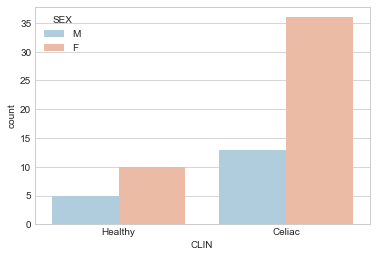

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='CLIN',hue='SEX',data=ad_data,palette='RdBu_r')

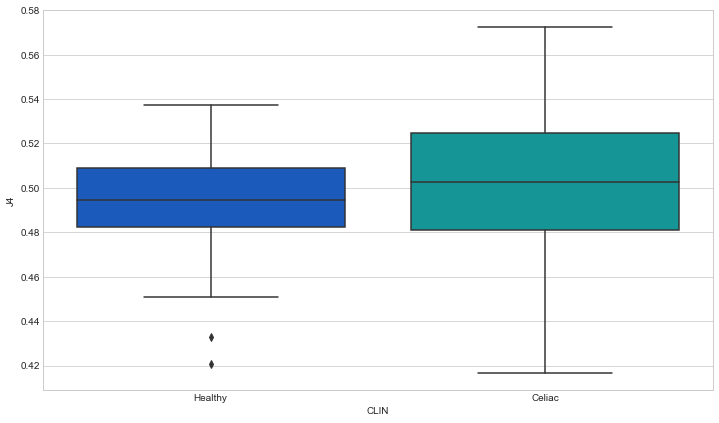

In [39]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='CLIN',y='J4',data=ad_data,palette='winter')

In [40]:
# old
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [19]:
# Create our imputer to replace missing values with the mean e.g.
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp = imp.fit(ad_data.iloc[:,3:])
ad_data.iloc[:,3:] = imp.transform(ad_data.iloc[:,3:])

In [41]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,V1,V2,V3,V4,V5,V6,V7,D1,D2,D3,...,V6_J3-VJ,V6_J4-VJ,V6_J5-VJ,V6_J6-VJ,V7_J1-VJ,V7_J2-VJ,V7_J3-VJ,V7_J4-VJ,V7_J5-VJ,V7_J6-VJ
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,92.000000,98.000000,98.000000,98.000000,...,96.000000,98.000000,97.000000,98.000000,33.000000,35.000000,51.000000,83.000000,65.000000,77.000000
mean,0.196356,0.029925,0.486402,0.237721,0.039827,0.006685,0.003285,0.108151,0.156763,0.327803,...,0.000950,0.002800,0.001043,0.001678,0.000155,0.000216,0.000602,0.001655,0.000793,0.000908
std,0.039813,0.009526,0.053478,0.040164,0.012054,0.001890,0.005000,0.013449,0.029768,0.024401,...,0.000389,0.000790,0.000375,0.000774,0.000136,0.000234,0.000610,0.002459,0.000923,0.001180
min,0.103290,0.014028,0.361877,0.152597,0.012288,0.002414,0.000029,0.060442,0.110496,0.259437,...,0.000193,0.000934,0.000359,0.000448,0.000019,0.000017,0.000019,0.000018,0.000023,0.000018
25%,0.171295,0.022522,0.453688,0.209658,0.031377,0.005495,0.000138,0.100913,0.137994,0.310728,...,0.000696,0.002246,0.000813,0.001113,0.000064,0.000067,0.000041,0.000060,0.000057,0.000064
50%,0.197269,0.028779,0.489975,0.234685,0.040292,0.006230,0.000345,0.110841,0.150053,0.327424,...,0.000888,0.002716,0.000971,0.001519,0.000115,0.000144,0.000296,0.000133,0.000155,0.000170
75%,0.218827,0.034885,0.525022,0.264731,0.046331,0.007642,0.007388,0.115086,0.170968,0.345101,...,0.001159,0.003265,0.001203,0.002079,0.000203,0.000282,0.001091,0.003536,0.001580,0.001612
max,0.291004,0.072450,0.604760,0.363001,0.076849,0.012422,0.016746,0.133699,0.270925,0.395441,...,0.002449,0.004804,0.002335,0.005364,0.000604,0.001207,0.002441,0.008103,0.002983,0.003936


In [42]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

Text(0.5,0,'J4')

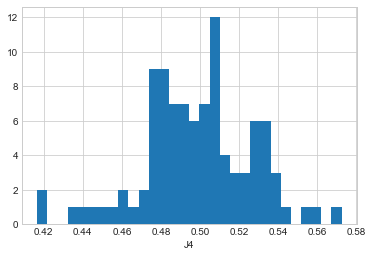

In [6]:
sns.set_style('whitegrid')
ad_data['J4'].hist(bins=30)
plt.xlabel('J4')

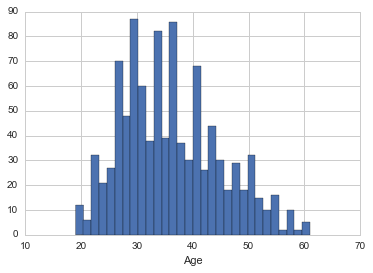

In [48]:
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

**Create a jointplot showing Area Income versus Age.**

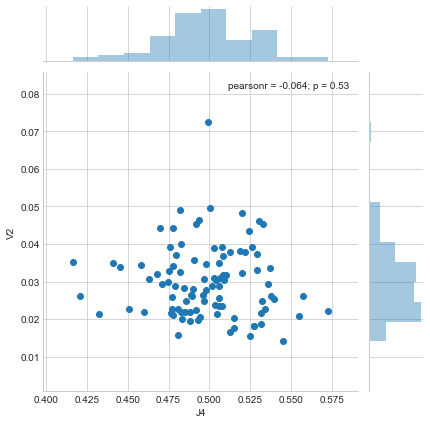

In [9]:
sns.jointplot(x='J4',y='V2',data=ad_data)

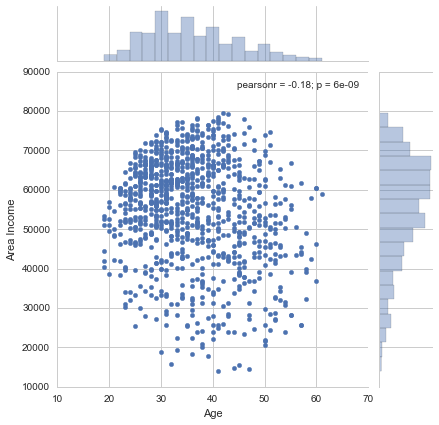

In [64]:
sns.jointplot(x='Age',y='Area Income',data=ad_data)

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

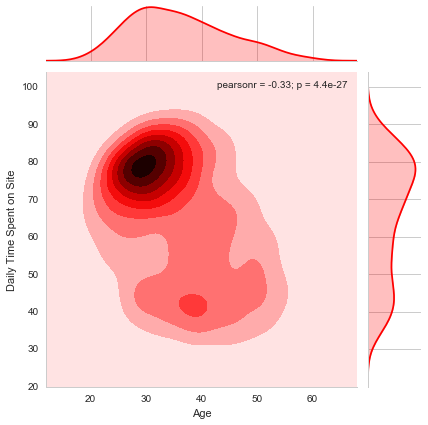

In [66]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='red',kind='kde');

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

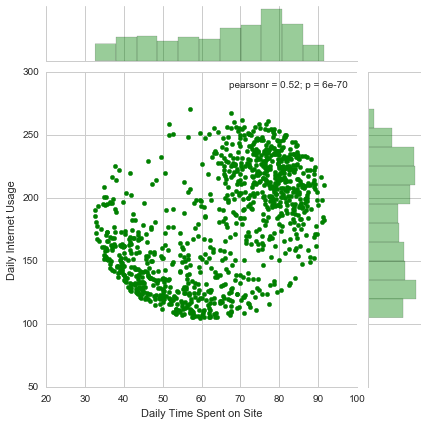

In [72]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

In [12]:
h = ad_data[:,1]+ad_data[:,10:30]
h

TypeError: unhashable type: 'slice'

In [21]:
y = ad_data.columns.values 


h = [row[0:] for row in y]
h

['SUBJECTn',
 'CLIN',
 'SEX',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'D6',
 'D7',
 'V1-18',
 'V1-2',
 'V1-24',
 'V1-3',
 'V1-38-4',
 'V1-45',
 'V1-46',
 'V1-58',
 'V1-68',
 'V1-69',
 'V1-69-2',
 'V1-8',
 'V1-NL1',
 'V1/OR15-1',
 'V1/OR15-2',
 'V1/OR15-3',
 'V1/OR15-4',
 'V1/OR15-5',
 'V1/OR15-9',
 'V2-10',
 'V2-26',
 'V2-5',
 'V2-70',
 'V2/OR16-5',
 'V3-11',
 'V3-13',
 'V3-15',
 'V3-16',
 'V3-19',
 'V3-20',
 'V3-21',
 'V3-22',
 'V3-23',
 'V3-30',
 'V3-30-3',
 'V3-30-33',
 'V3-33',
 'V3-35',
 'V3-38',
 'V3-38-3',
 'V3-43',
 'V3-47',
 'V3-48',
 'V3-49',
 'V3-52',
 'V3-53',
 'V3-54',
 'V3-64',
 'V3-66',
 'V3-69-1',
 'V3-7',
 'V3-71',
 'V3-72',
 'V3-73',
 'V3-74',
 'V3-9',
 'V3-NL1',
 'V3/OR15-7',
 'V3/OR16-10',
 'V3/OR16-12',
 'V3/OR16-13',
 'V3/OR16-15',
 'V3/OR16-6',
 'V3/OR16-8',
 'V3/OR16-9',
 'V4-28',
 'V4-30-2',
 'V4-30-4',
 'V4-31',
 'V4-34',
 'V4-38-2',
 'V4-39',
 'V4-4',
 'V4-55',
 'V4-59',
 'V4-61',
 'V4/OR15-8',
 'V5-10-1',
 'V5-51'

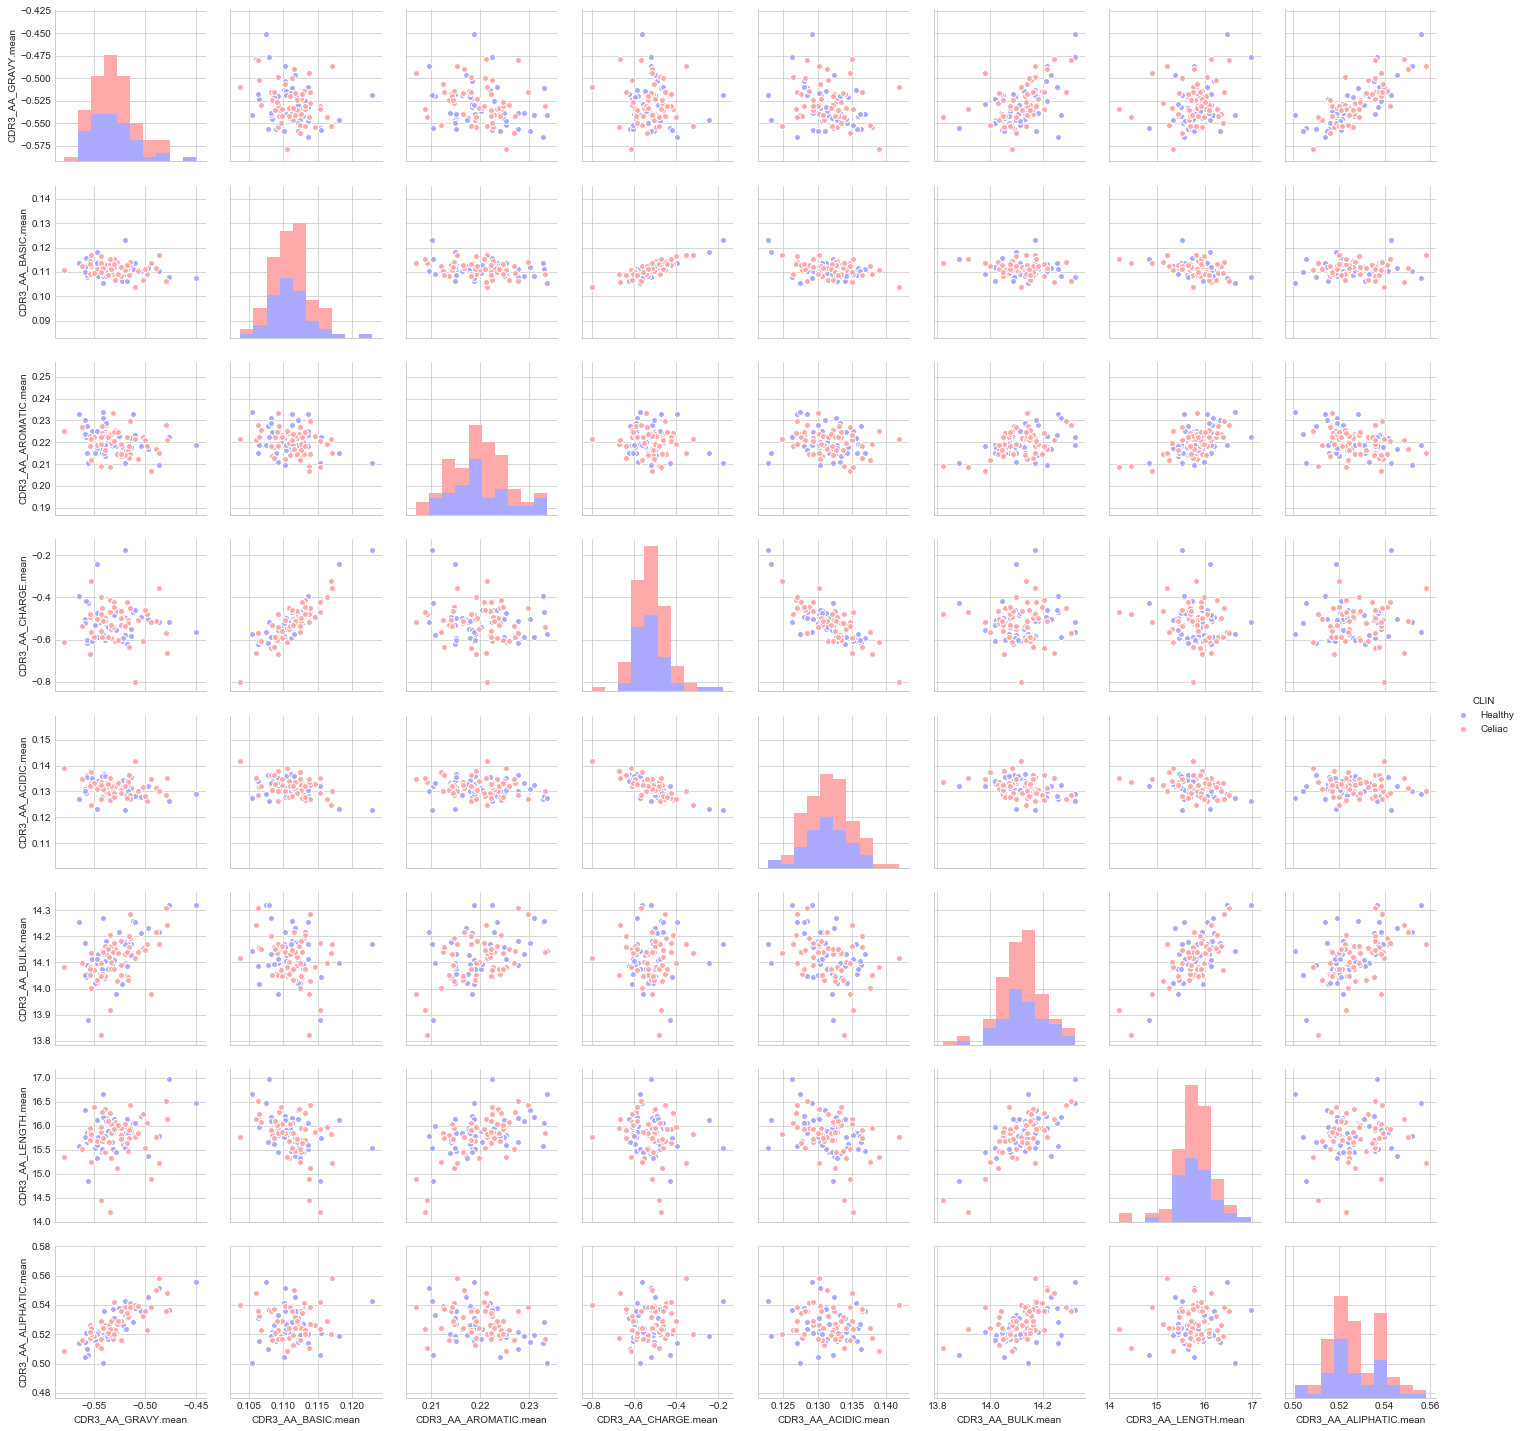

In [20]:
sns.pairplot(ad_data.loc[:,{'CLIN', 'CDR3_AA_ACIDIC.mean',
 'CDR3_AA_ALIPHATIC.mean',
 'CDR3_AA_AROMATIC.mean',
 'CDR3_AA_BASIC.mean',
 'CDR3_AA_BULK.mean',
 'CDR3_AA_CHARGE.mean',
 'CDR3_AA_GRAVY.mean',
 'CDR3_AA_LENGTH.mean'}],hue='CLIN',palette='bwr')

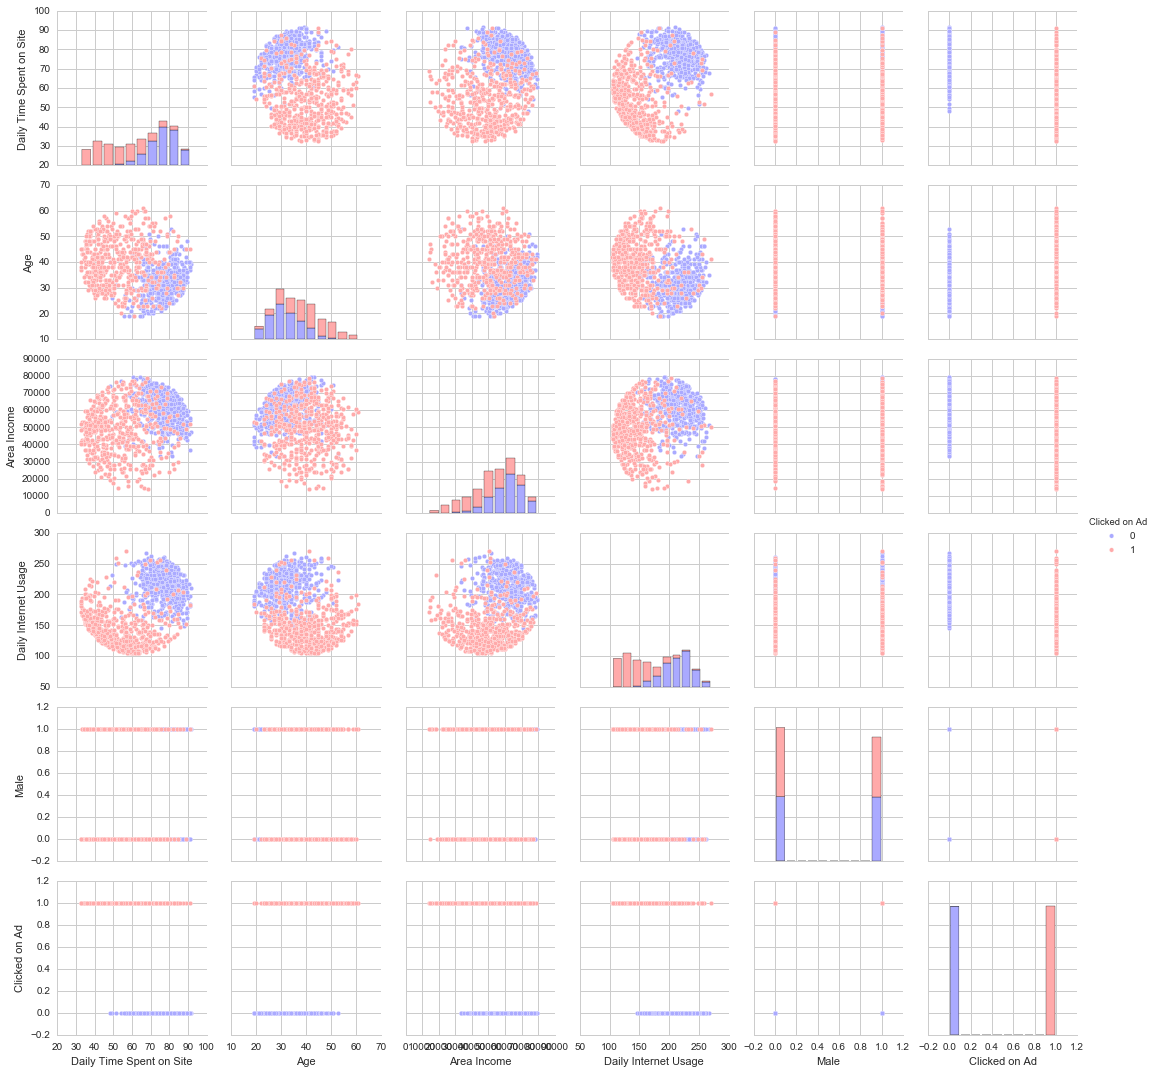

In [84]:
sns.pairplot(ad_data,hue='Clicked on Ad',palette='bwr')

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [22]:
from sklearn.model_selection import train_test_split

In [24]:
X = ad_data.iloc[:,3:]
y = ad_data.loc[:,'CLIN']

In [88]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [92]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [28]:
predictions = logmodel.predict(X_test)

In [94]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [29]:
from sklearn.metrics import classification_report

In [30]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     Celiac       0.52      0.61      0.56        18
    Healthy       0.42      0.33      0.37        15

avg / total       0.48      0.48      0.48        33



In [96]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



# for feature_selected data

In [85]:
data2.head()

,56-JL,CLIN,J4,V3_J1-VJ,V4-31,V1_J3_VJ,D7-27,D5/OR15-5a,SUBJECTn,V2_J1-VJ,...,V3-49,V3-20,47-JL,V3-23,V3-38,60-JL,V2_J6-VJ,V3-33,D5-24,50-JL
0,0.000043,Healthy,0.503518,0.004614,0.028422,0.019093,0.008106,0.001759,BC_10,0.000204,...,0.006245,0.001478,0.000043,0.156309,0.000055,0.077696,0.003900,0.021310,0.024675,0.000039
1,0.000043,Healthy,0.537397,0.007162,0.030014,0.024007,0.011455,0.001367,BC_11,0.000462,...,0.009202,0.000655,0.000058,0.151377,0.000055,0.076449,0.003234,0.027857,0.025643,0.000019
2,0.000043,Healthy,0.485792,0.003754,0.025682,0.016831,0.006986,0.001218,BC_12,0.000075,...,0.009124,0.001989,0.000043,0.084504,0.000055,0.078115,0.004450,0.029535,0.025781,0.000039
3,0.000043,Healthy,0.529982,0.005394,0.034155,0.021854,0.008404,0.001076,BC_13,0.000916,...,0.013653,0.004100,0.000043,0.112368,0.000055,0.075581,0.006892,0.038343,0.029793,0.000039
4,0.000018,Healthy,0.460081,0.006474,0.027602,0.026980,0.005513,0.001014,BC_14,0.000196,...,0.009142,0.001850,0.000043,0.112899,0.000055,0.077916,0.003824,0.035410,0.018745,0.000039


In [73]:
feature_list 

array(['V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'],
      dtype=object)

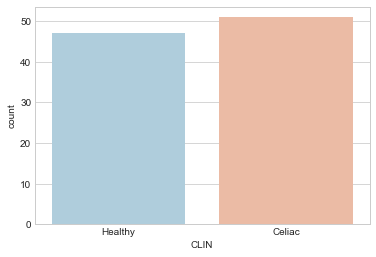

In [77]:
sns.set_style('whitegrid')
sns.countplot(x='CLIN',data=data2,palette='RdBu_r')

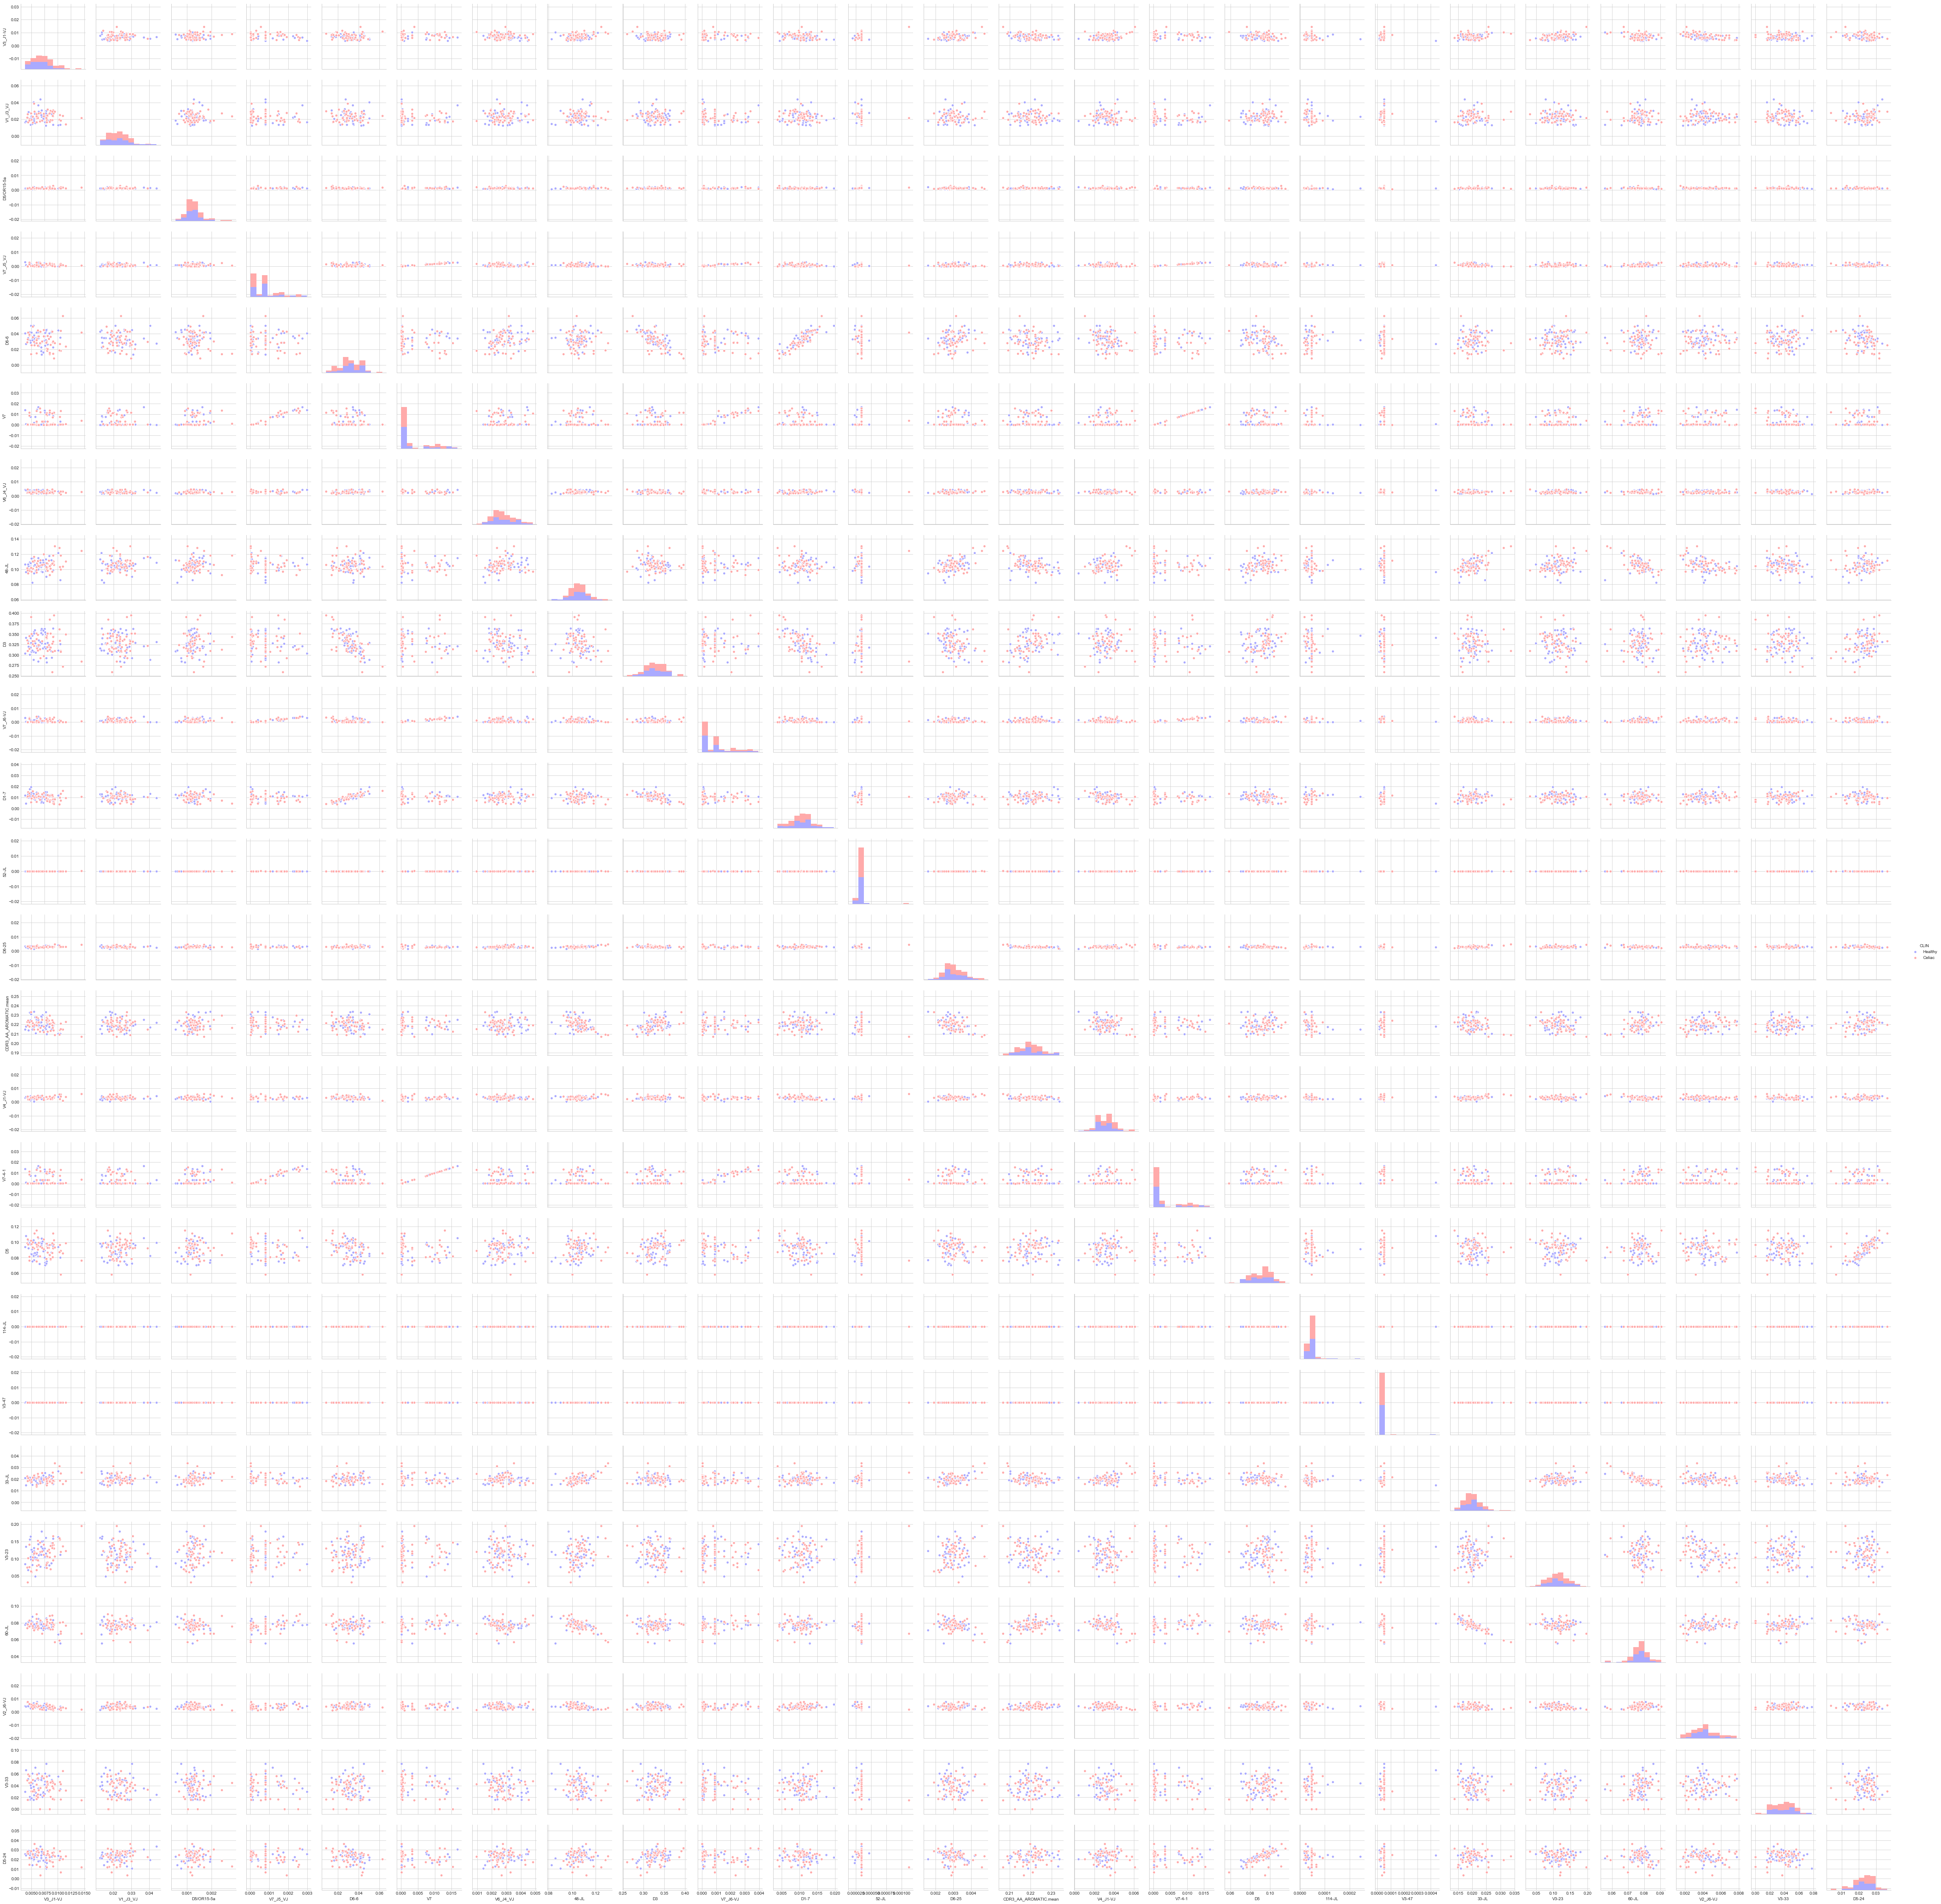

In [74]:
sns.pairplot(ad_data.loc[:,{'CLIN','CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}],hue='CLIN',palette='bwr')

### logistic regression for selected_data

In [98]:
from sklearn.model_selection import train_test_split


X = data2.loc[:,{'V2_J2_VJ', 'D6-19', 'V4-4', 'D3-10', 'V4-34', 'V2_J4-VJ', 'V1-8',
       'J4', 'D7-27', 'V1_J4_VJ', 'V1-58', 'V4_J3-VJ', 'D6-13',
       'V2_J1-VJ', 'V1_J2-VJ', 'D3-16', '69-JL', '21-JL', 'V1_J5_VJ',
       '9-JL', 'V4/OR15-8', 'V3-19', 'V2_J2-VJ', 'V6_J4-VJ', 'D2/OR15-2a',
       '6-JL', '56-JL', 'V1_J4-VJ', 'V2_J5_VJ', 'V1-2', '50-JL', '47-JL',
       'V5_J2-VJ', 'V3-49', '66-JL', '72-JL', 'V3-20', 'V3_J5_VJ',
       '99-JL', '45-JL', 'V4-31', 'V3-38', 'V7_J6_VJ', 'V1',
       'CDR3_AA_AROMATIC.mean', 'V2_J6-VJ', 'D3', 'V3_J1-VJ', 'V7-4-1',
       'D6-25', '33-JL', 'V3-23', '52-JL', 'V3-33', 'V1_J3_VJ', 'V3-47',
       '60-JL', 'D6-6', '114-JL', 'V7', 'V7_J5_VJ', 'D5/OR15-5a', 'D1-7',
       'V4_J1-VJ', 'D5', 'V7_J6-VJ', 'V6_J4_VJ', '48-JL', 'D5-24'}]
y = data2.loc[:,'CLIN']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23)

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     Celiac       0.57      1.00      0.72        13
    Healthy       0.00      0.00      0.00        10

avg / total       0.32      0.57      0.41        23



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
